In [1]:
import pandas as pd
import numpy as np
import datetime

#import extra shit in case I need it
import os
import warnings

#plots must be pretty 
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib import cm
from matplotlib.colors import TwoSlopeNorm

from matplotlib import rc, rcParams
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern']})
fi = 22
plt.rcParams.update({'font.size': fi-5})

In [2]:
hv_procs = pd.read_csv("HV_procs.csv")
print(hv_procs)

         Time             Type       Ability            Amount  \
0   00:22.023  Resource Change  High Voltage  1 Arcane Charges   
1   00:36.292  Resource Change  High Voltage  1 Arcane Charges   
2   00:58.278  Resource Change  High Voltage  1 Arcane Charges   
3   01:20.152  Resource Change  High Voltage  1 Arcane Charges   
4   01:42.138  Resource Change  High Voltage  1 Arcane Charges   
5   01:43.069  Resource Change  High Voltage  1 Arcane Charges   
6   02:04.048  Resource Change  High Voltage  1 Arcane Charges   
7   02:04.721  Resource Change  High Voltage  1 Arcane Charges   
8   02:26.118  Resource Change  High Voltage  1 Arcane Charges   
9   02:26.736  Resource Change  High Voltage  1 Arcane Charges   
10  03:09.895  Resource Change  High Voltage  1 Arcane Charges   
11  03:31.824  Resource Change  High Voltage  1 Arcane Charges   
12  03:32.547  Resource Change  High Voltage  1 Arcane Charges   
13  03:54.054  Resource Change  High Voltage  1 Arcane Charges   
14  03:54.

In [3]:
spell_casts = pd.read_csv("Spell_casts.csv")
print(spell_casts)

          Time  Type          Ability                Source → Target  \
0    00:14.833  Cast   Arcane Barrage  Blinkladen → Training Dummy 1   
1    00:16.041  Cast   Arcane Barrage  Blinkladen → Training Dummy 1   
2    00:18.473  Cast   Arcane Barrage  Blinkladen → Training Dummy 1   
3    00:19.701  Cast   Arcane Barrage  Blinkladen → Training Dummy 1   
4    00:20.875  Cast  Arcane Missiles  Blinkladen → Training Dummy 1   
..         ...   ...              ...                            ...   
442  12:45.563  Cast   Arcane Barrage  Blinkladen → Training Dummy 2   
443  12:48.008  Cast   Arcane Barrage  Blinkladen → Training Dummy 2   
444  12:49.167  Cast   Arcane Barrage  Blinkladen → Training Dummy 2   
445  12:51.611  Cast   Arcane Barrage  Blinkladen → Training Dummy 2   
446  12:52.876  Cast   Arcane Barrage  Blinkladen → Training Dummy 2   

     Unnamed: 4  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
442      

In [4]:
am_filter = spell_casts[spell_casts.apply(lambda r: r.str.contains('Arcane Missiles').any(), axis=1)]
abarr_filter = spell_casts[spell_casts.apply(lambda r: r.str.contains('Arcane Barrage').any(), axis=1)]

In [5]:
def format_times(input_column): 
    formatted_times = np.zeros(input_column.shape[0])
    for ind in range(input_column.shape[0]):
        formatted_times[ind] = 60*float(input_column.values[ind].split(":")[0]) + \
                                  float(input_column.values[ind].split(":")[1])
    return formatted_times

am_times = format_times(am_filter["Time"])
print(am_times)

hv_times = format_times(hv_procs["Time"])
print(hv_times)

[ 20.875  35.455  57.473  79.424 101.305 123.285 145.222 167.09  189.097
 211.041 232.977 247.61  269.464 291.478 313.422 335.36  357.199 379.221
 401.115 423.108 444.977 466.977 488.916 514.511 536.393 558.393 580.317
 583.98  605.906 631.461 653.412 675.384 697.321 715.605 737.502 759.481]
[ 22.023  36.292  58.278  80.152 102.138 103.069 124.048 124.721 146.118
 146.736 189.895 211.824 212.547 234.054 234.636 249.061 270.449 271.261
 292.547 293.116 314.318 337.004 358.595 380.004 380.226 380.449 402.059
 424.011 445.768 467.878 468.684 490.364 515.627 537.212 538.151 559.611
 581.218 584.884 585.718 607.426 633.015 654.48  676.28  676.855 698.226
 716.501 716.917 739.055 760.272 760.981]


In [6]:
#look for the shortest time between am casts as a proxy to distinguish them
min_am_cast = np.min(np.diff(am_times))

#this is a shit check, instead I shuld filter between cast starts and finishes from the log but idk where the info is
hv_procs = np.zeros(len(am_times))
for cast in range(len(am_times)):
    hv_procs[cast] = 0
    for proc in range(len(hv_times)):
        if (hv_times[proc] - am_times[cast] < min_am_cast) and (hv_times[proc] - am_times[cast] > 0):
            hv_procs[cast] = hv_procs[cast] + 1
            
print(hv_procs)

[1. 1. 1. 1. 2. 2. 2. 0. 1. 2. 2. 1. 2. 2. 1. 1. 1. 3. 1. 1. 1. 2. 1. 1.
 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2.]


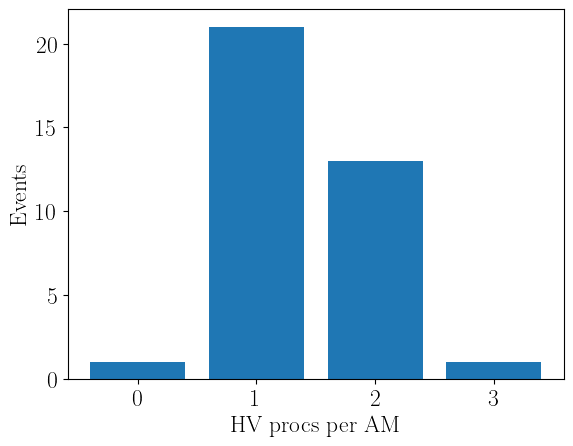

In [7]:
labels, counts = np.unique(hv_procs, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel("HV procs per AM")
plt.ylabel("Events")
plt.savefig("HV_procs.pdf")

In [8]:
full_array = np.stack([labels, counts], axis=1)

np.savetxt("HV_distribution.txt",full_array, delimiter="\t", header="Charges\t   Counts", comments='')